## Week 07: Gaussian quadrature, adaptive quadrature, Monte Carlo integration
### Math goals
- identify a quadrature rule with particular properties
- set up and reason about Monte Carlo approximation to an integral
- use an adaptive method to find an integral to within some tolerance

### Python goals
1. implement a Python function that can take vectorized coordinate inputs and return a vector output to a piecewise mathematical function
2. use a list comprehension to call a Python function on individual points and create a vector of outputs
3. see an example of adaptive quadrature using the trapezoid rule on the "Batman" function


In [3]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

(-0.05929839554419578,
 1.2556236809072239,
 -0.05865127637327209,
 1.256149017976784)

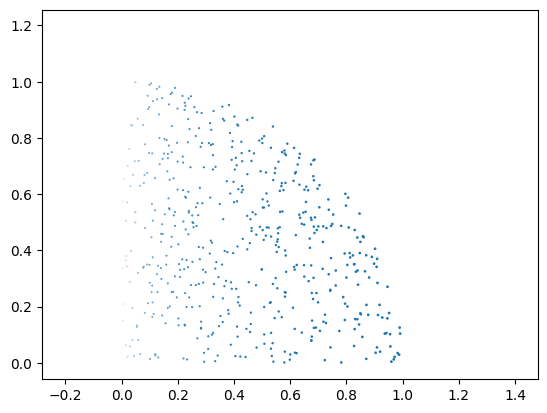

In [13]:
# 1. vectorized inputs to a function
def f1(x,y):
    """ f1(x,y) = 0 on x^2+y^2>1 and x on x^2+y^2 <= 1"""
    return x*((x**2 + y**2)<=1)

xyvals = rng.uniform(0,1.2,[1000,2])
z = f1(xyvals[:,0],xyvals[:,1])
plt.scatter(xyvals[:,0],xyvals[:,1],z)
plt.axis('equal')

(-0.05903438121575844,
 1.2592407182499086,
 -0.05722507830251476,
 1.2598066929083813)

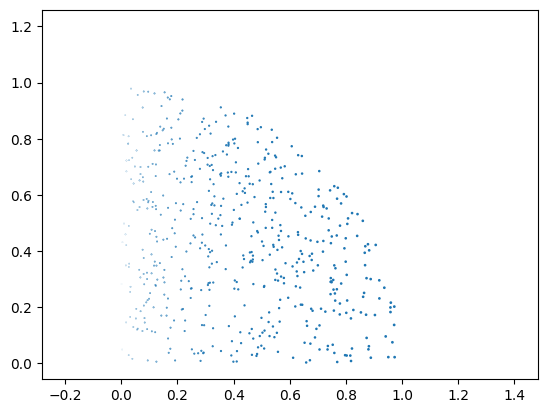

In [19]:
# 2. list comprehension
def f1(x,y):
    """ f1(x,y) = 0 on x^2+y^2>1 and x on x^2+y^2 <= 1"""
    return x*((x**2 + y**2)<=1)

xyvals = rng.uniform(0,1.2,[1000,2])
# the list comprehension embeds a "for" to make a new list.
z1 = np.array([f1(xyvals[k,0],xyvals[k,1]) for k in range(len(xyvals))])
plt.scatter(xyvals[:,0],xyvals[:,1],z1)
plt.axis('equal')

In [26]:
# 3. adaptive quadrature Batman example

def trap(f,a,b,fa,fb):
    return (fa+fb)/2*(b-a)

def adapquad(f,a0,b0,tol0,depth=100):
    """ implement adaptive quadrature using the trapezoidal rule

    Args:
        f: function of integration
        a0: lower bound of integral
        b0: upper bound of integral
        tol0: desired accuracy of integration (error < tol0)
        depth: maximum number of active subintervals during the calculation

    Results:
        result: the approximated integral
        num_interal: the number of intervals used for the approximation
        a_list: a list of lower bounds of all intervals
    """
    a_list=[]
    result=0
    n=0
    num_interval=0
    a=np.zeros(depth)
    b=np.zeros(depth)
    tol=np.zeros(depth)
    app=np.zeros(depth)
    a[0]=a0
    b[0]=b0
    tol[0]=tol0
    a_list.append(a0)
    
    fa=f(a[n])
    fb=f(b[n])
    app[0]=trap(f,a[n],b[n],fa,fb)

    while n>=0 and n<depth:
        c=(a[n]+b[n])/2
        oldapp=app[n]
        fa=f(a[n])
        fc=f(c)
        fb=f(b[n])
        app[n]=trap(f,a[n],c,fa,fc)
        app[n+1]=trap(f,c,b[n],fc,fb)

        if abs(oldapp-(app[n]+app[n+1]))<3*tol[n] :
            result=result+app[n]+app[n+1]
            n=n-1
        else:
            b[n+1]=b[n]
            b[n]=c
            a[n+1]=c
            a_list.append(a[n])
            a_list.append(a[n+1])
            tol[n]=tol[n]/2
            tol[n+1]=tol[n]
            n=n+1
            num_interval+=1
            

    return result,num_interval,a_list

In [22]:
# batman helper functions

def batman_upper(x):
    f = (h(x)-l(x))*np.heaviside(x+1.0, 0.5) + \
    (r(x)-h(x))*np.heaviside(x-1.0, 0.5)+ \
    (l(x)-w(x))*np.heaviside(x+3.0, 0.5) + \
    (w(x)-r(x))*np.heaviside(x-3.0, 0.5) +w(x)  
    
    return np.real(f)

def batman_lower(x):
    f = 0.5*(np.abs(0.5*x) + sqrt(1.0 - (np.abs(np.abs(x)-2.0)-1.0)**2) - \
        (1.0/112.0)*(3.0*sqrt(33.0)-7.0)*x**2 \
        + 3.0*sqrt(1.0-(x/7.0)**2)-3.0) * (np.sign(x+4.0)-np.sign(x-4.0))-\
        3.0*sqrt(1.0-(x/7.0)**2)

    return np.real(f)

def w(x):
    return 3.0*sqrt(1.0-(x/7.0)**2)

def l(x):
    return 0.5*(x+3.0)-(3.0/7.0)*sqrt(10.0)*sqrt(4.0-(x+1.0)**2) + \
        (6.0/7.0)*sqrt(10.0);
    
def h(x):
    return 0.5*(3.0*(np.abs(x-0.5)+np.abs(x+0.5)+6.0)-\
        11.0*(np.abs(x+0.75)+np.abs(x-0.75)));

def r(x):
    return 0.5*(3.0-x) - (3.0/7.0)*sqrt(10.0)*sqrt(4.0-(x-1.0)**2) + \
        (6.0/7.0)*sqrt(10.0);

def sqrt(x):
    return np.lib.scimath.sqrt(x)

Text(0.5, 1.0, 'batman logo')

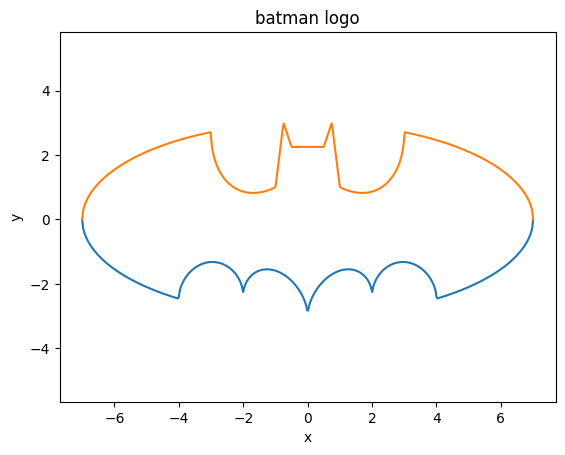

In [24]:
# plot batman

x=np.linspace(-7,7,500)
lower=batman_lower(x)
upper=batman_upper(x)

plt.plot(x,lower)
plt.plot(x,upper)
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("batman logo")

In [30]:
# set tolerance to 1e-3 while using trapezoid so it doesn't take too long.
lower_area,ln,la = adapquad(batman_lower,-7,7,1e-3,depth=100)
upper_area,un,ua = adapquad(batman_upper,-7,7,1e-3,depth=100)

app_area=abs(lower_area)+abs(upper_area)
print("The total area is",abs(lower_area)+abs(upper_area))
print("The max number of intervals used is",np.max([ln,un]))


The total area is 48.42425662279841
The max number of intervals used is 747
